<a href="https://colab.research.google.com/github/Krishnateja001/heart_disease_prediction/blob/main/heart_attack_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 


data = pd.read_csv('/content/framingham_heart_disease.csv')
print(data.columns)
data.head(10)
data.dtypes

In [ ]:
#education does not play important role 
data=data.drop('education',axis=1)
# cigsperday and currentsmoker are redundant with each other thats why we remove cigs per day columns
data=data.drop('cigsPerDay',axis=1)

In [ ]:
!pip install matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [ ]:
import seaborn as sn

data.TenYearCHD.value_counts()
sn.countplot(x='TenYearCHD',data=data)

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [ ]:
data.isnull().sum()

In [ ]:
#mean_cigs_per_day = round(data['cigsPerDay'].mean())
mean_BPMeds= round(data['BPMeds']).mean()
mean_totChol = round(data['totChol']).mean()
mean_BMI = round(data['BMI']).mean()
mean_glucose =round(data['glucose']).mean()
estimated_data =data
#estimated_data['cigsPerDay'].fillna(mean_cigs_per_day,inplace= True)
estimated_data['BPMeds'].fillna(mean_BPMeds,inplace = True)
estimated_data['totChol'].fillna(mean_totChol,inplace =True)
estimated_data['BMI'].fillna(mean_BMI, inplace = True)
estimated_data['glucose'].fillna(mean_glucose, inplace =True)
estimated_data =estimated_data.fillna(0)
print(estimated_data.isnull().sum())

In [ ]:
data.head(10)

In [ ]:
data.groupby('TenYearCHD').mean()
#As diaBP,BMI,heartRate have values in similar zones and almost equal to one another for 1 or 0 values for TenYearCHD hence they can be dropped.
#In other words,these 3 have low variance for categoreies of TenYearCHD

In [ ]:
##Defining training and test data and predicting with logistic regression function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score 
from sklearn.metrics import roc_curve, roc_auc_score

raw_data = data
data = estimated_data
X = data[['male','age','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','BMI','totChol','sysBP','glucose']]
y = data['TenYearCHD']
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.1,random_state =1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [i for i in X.columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
print(X.columns)
print(sorted(forest_importances))
print(importances)

In [ ]:
# show the most important features
import numpy as np
most_important = np.argsort(forest_importances)[::-1][:5]
most_important

In [49]:
raw_data = data
data = estimated_data
X = data[['BMI','sysBP','totChol','glucose','male']] #feature importance columns
#X = data[['male', 'currentSmoker', 'BPMeds', 'prevalentStroke']]
y = data['TenYearCHD']
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.1,random_state =1)
print('Xtrain_size=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)
#model = LogisticRegression(max_iter =1000)
model = LogisticRegression(C=1, max_iter=100000, penalty='l1', solver='liblinear')
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
#printing logistic regression equation
print('Logistic Regression equation, {} + {}'.format(model.coef_ , model.intercept_))

Xtrain_size= (3814, 5)
X_test= (424, 5)
y_train= (3814,)
y_test= (424,)
Logistic Regression equation, [[-0.00074123  0.02214246  0.00327228  0.00899699  0.61172672]] + [-6.53472241]


In [50]:
print('accuracy score: {:4f}'.format(accuracy_score(y_test,y_pred)))
print('Precision score: ', precision_score(y_test, y_pred,average='micro'))
print('Recall score: ', recall_score(y_test, y_pred,average='micro'))
#checking AUC under ROC curve
y_score = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
#print (true_positive_rate,false_positive_rate)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

accuracy score: 0.841981
Precision score:  0.8419811320754716
Recall score:  0.8419811320754716
roc_auc_score for Logistic Regression:  0.7047825497900013


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


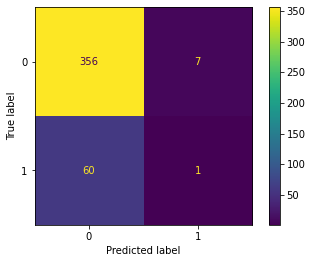

In [52]:
from sklearn.metrics import plot_confusion_matrix as PCM
PCM(model,X_test,y_test)

In [53]:
from sklearn.metrics import classification_report as CR
results = model.predict(X_test)
print(CR(y_test,results))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       363
           1       0.12      0.02      0.03        61

    accuracy                           0.84       424
   macro avg       0.49      0.50      0.47       424
weighted avg       0.75      0.84      0.79       424



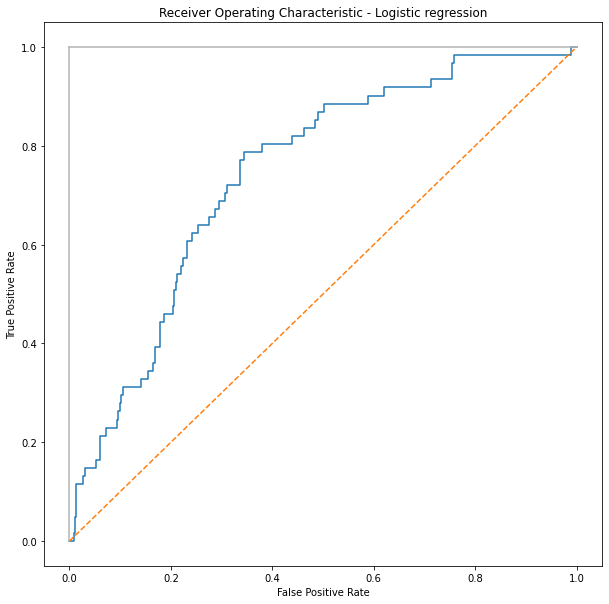

In [48]:
# Plotting ROC Curve
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import learning_curve



lg = LogisticRegression(C=0.1, max_iter=100000, penalty='l1', solver='liblinear')
# fit
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


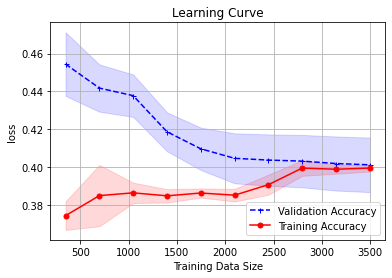

In [55]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lg, X=X_train, y=y_train,
                                                       cv=12, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1,scoring='neg_log_loss')#DEFULT

train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)
#
# Plot the learning curve
#
#train_sizes = [0, 349,  699, 1048, 1398, 1748, 2097, 2447, 2796, 3146]
#plt.ylim([0,1])
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [28]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8537735849056604

#SVM

In [29]:
from sklearn.svm import SVC

In [30]:
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm = SVC(kernel='rbf', probability=True)
svm_clf = GridSearchCV(svm, param_grid, cv=10)

In [31]:
svm_fit = svm_clf.fit(X_train,y_train)
#X_train, X_test,y_train, y_test
svm_clf.best_params_ 

{'C': 0.001, 'gamma': 0.001}

In [32]:
svm_predict = svm_clf.predict(X_test)       

In [33]:
from sklearn.metrics import classification_report as CR
results = svm_clf.predict(X_test)
print(CR(y_test,results))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       363
           1       0.00      0.00      0.00        61

    accuracy                           0.86       424
   macro avg       0.43      0.50      0.46       424
weighted avg       0.73      0.86      0.79       424



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test,svm_predict)
print(svm_accuracy)

0.8561320754716981


In [35]:
print('accuracy score: {:4f}'.format(accuracy_score(y_test,svm_predict)))
print('Precision score: ', precision_score(y_test, svm_predict,average='micro'))
print('Recall score: ', recall_score(y_test, svm_predict,average='micro'))
#checking AUC under ROC curve
y_score = svm_clf.predict_proba(X_test)[:,1]
false_positive_rate_svm, true_positive_rate_svm, threshold = roc_curve(y_test, y_score)
#print (true_positive_rate,false_positive_rate)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

accuracy score: 0.856132
Precision score:  0.8561320754716981
Recall score:  0.8561320754716981
roc_auc_score for Logistic Regression:  0.4260940251998374


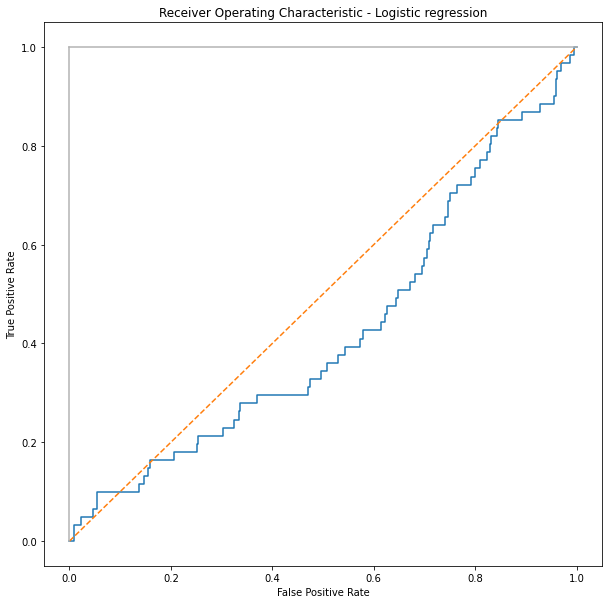

In [36]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate_svm, true_positive_rate_svm)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

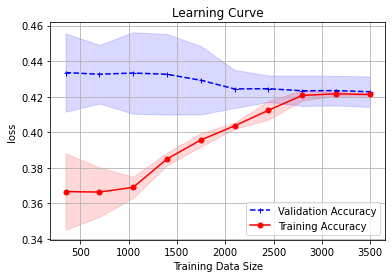

In [38]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm, X=X_train, y=y_train,
                                                       cv=12, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1,scoring='neg_log_loss')

train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)
#
# Plot the learning curve
#
#train_sizes = [0, 349,  699, 1048, 1398, 1748, 2097, 2447, 2796, 3146]
#plt.ylim([0,1])
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='lower right')
plt.show()

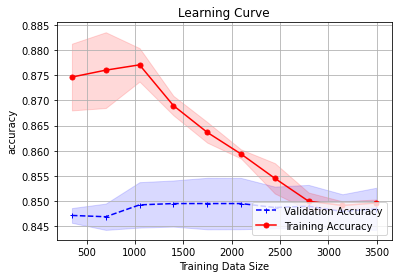

In [41]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm, X=X_train, y=y_train,
                                                       cv=12, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
#train_sizes = [0, 349,  699, 1048, 1398, 1748, 2097, 2447, 2796, 3146]
#plt.ylim([0,1])
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()